In [1]:
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from matplotlib import pyplot as plt

from scipy.optimize import dual_annealing



#### Dataset creation

In [2]:
nb_samples = 15

np.random.seed(22)
X = np.random.randint(1, high=10, size=(nb_samples, 2))
print(X)

y = X[:, 0] / X[:, 1]
print(y)


[[6 5]
 [1 5]
 [7 7]
 [5 9]
 [5 3]
 [9 8]
 [3 9]
 [9 6]
 [5 3]
 [3 2]
 [7 4]
 [4 3]
 [8 8]
 [8 8]
 [5 5]]
[1.2        0.2        1.         0.55555556 1.66666667 1.125
 0.33333333 1.5        1.66666667 1.5        1.75       1.33333333
 1.         1.         1.        ]


#### Model creation and visualization

In [3]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X, y)
model.score(X, y)


0.9343996768065437

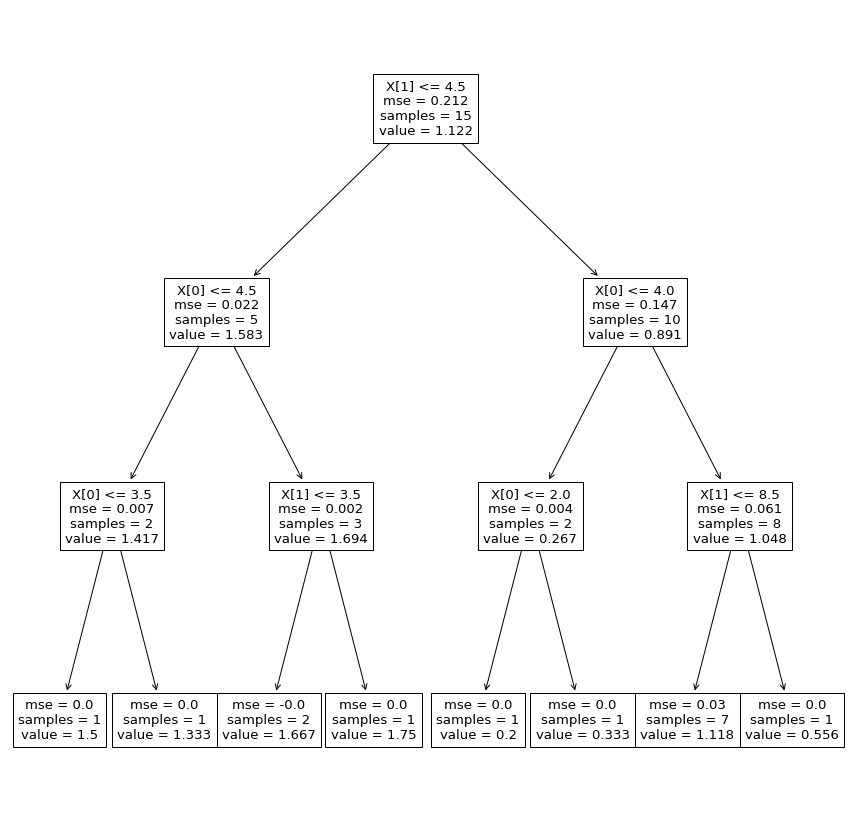

In [4]:
plt.figure(figsize=(15, 15))
tree.plot_tree(model)
plt.show()


#### SciPy Optimize

In [5]:
def objective(v):

	return model.predict(np.array([v]))[0]


In [6]:
bounds = [[1, 10], [1, 10]]

result = dual_annealing(objective, bounds, maxiter=100)

print(f"Status: {result['message']}")
print(f"Total Evaluations: {result['nfev']}")
print(f"Minimum reached: {result['fun']}")
print(f"Solution vector: {result['x']}")


Status: ['Maximum number of iteration reached']
Total Evaluations: 410
Minimum reached: 0.2
Solution vector: [1.78224412 9.35220569]


In [7]:
bounds = [[1, 10], [1, 4]]

result = dual_annealing(objective, bounds, maxiter=100)

print(f"Status: {result['message']}")
print(f"Total Evaluations: {result['nfev']}")
print(f"Minimum reached: {result['fun']}")
print(f"Solution vector: {result['x']}")


Status: ['Maximum number of iteration reached']
Total Evaluations: 404
Minimum reached: 1.3333333333333333
Solution vector: [4.32296802 1.87272909]


#### Maximization

In [8]:
def objective_max(v):

	return - model.predict(np.array([v]))[0]


In [9]:
bounds = [[1, 10], [1, 10]]

result = dual_annealing(objective_max, bounds, maxiter=100)

print(f"Status: {result['message']}")
print(f"Total Evaluations: {result['nfev']}")
print(f"Maximum reached: {-result['fun']}")
print(f"Solution vector: {result['x']}")


Status: ['Maximum number of iteration reached']
Total Evaluations: 410
Maximum reached: 1.75
Solution vector: [8.0829203 4.2638071]
